In [48]:
import numpy as np
import pandas as pd
import pyarrow as pa
from pyarrow import parquet
import seaborn as sns
import torch

import matplotlib.pyplot as plt

In [11]:
def get_rel_ebs(table_name):
    if table_name == "ethylene_methane":
        rel_ebs = [1.0] * 8 + [0.01] * 8
        rel_ebs[1] = 0.01
        parquet_file_or_folder = "../datasets/gas_sensor/ethylene_methane.parquet"
    elif table_name == "ethylene_CO":
        rel_ebs = [1.0] * 8 + [0.01] * 8
        parquet_file_or_folder = "../datasets/gas_sensor/ethylene_CO.parquet"
    elif table_name == "heavy_drinking":
        rel_ebs = [10.0] * 3
        parquet_file_or_folder = (
            "../datasets/heavy_drinking/all_accelerometer_data_pids_13.parquet"
        )
    else:
        raise ValueError(f"Unsupported Table Name: {table_name}")
    rel_ebs = [rel_eb * 1e-2 for rel_eb in rel_ebs]
    return rel_ebs, parquet_file_or_folder


def load_data(table_name):
    rel_ebs, path = get_rel_ebs(table_name)
    arrow_table = parquet.read_table(path)
    
    return arrow_table, rel_ebs

In [13]:
table, rel_ebs = load_data("ethylene_CO")
df = table.to_pandas()
print(df.describe())

           sensor_1      sensor_2      sensor_3      sensor_4      sensor_5  \
count  4.208262e+06  4.208262e+06  4.208262e+06  4.208262e+06  4.208262e+06   
mean   2.065616e+03  5.062184e+02  4.372539e+03  4.799244e+03  1.894957e+03   
std    7.897863e+02  1.474847e+03  1.604716e+03  1.729003e+03  4.390423e+02   
min   -5.262000e+01 -3.649000e+01 -4.504000e+01 -8.940000e+00 -1.219000e+01   
25%    1.323470e+03  9.120000e+00  2.986960e+03  3.282310e+03  1.503460e+03   
50%    1.789090e+03  3.889000e+01  4.494330e+03  4.946720e+03  1.984550e+03   
75%    2.869440e+03  1.589000e+02  5.658290e+03  6.178210e+03  2.262740e+03   
max    3.553640e+03  2.811651e+04  8.641340e+03  9.221020e+03  2.904040e+03   

           sensor_6      sensor_7      sensor_8      sensor_9     sensor_10  \
count  4.208262e+06  4.208262e+06  4.208262e+06  4.208262e+06  4.208262e+06   
mean   2.214691e+03  5.086638e+03  5.385426e+03  1.186241e+03  1.219252e+03   
std    4.350525e+02  1.964045e+03  2.068489e+03  4.

<Axes: ylabel='sensor_3'>

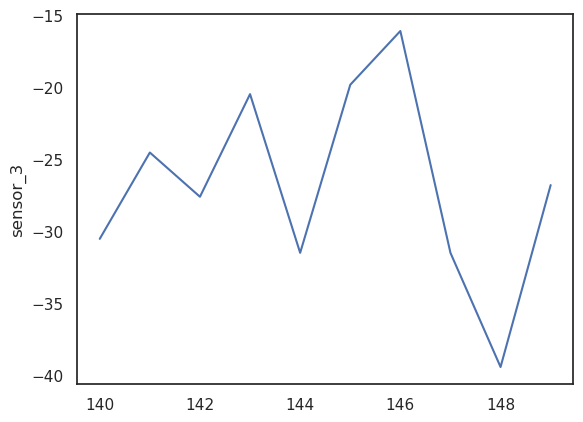

In [36]:
sns.lineplot(data=df["sensor_3"][140:150])

<Axes: ylabel='Frequency'>

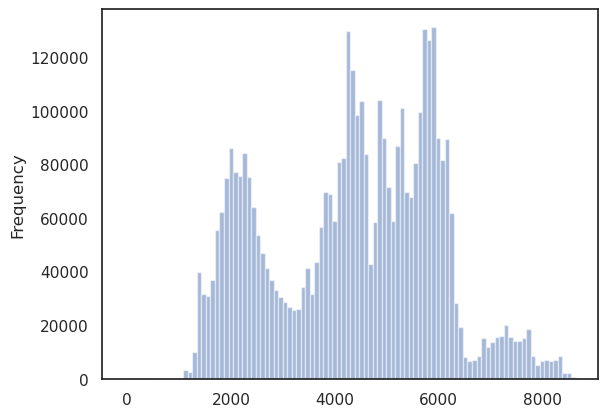

In [40]:
df["sensor_3"].plot.hist(bins=100, alpha=0.5)

In [14]:
corr = df.corr()

<Axes: >

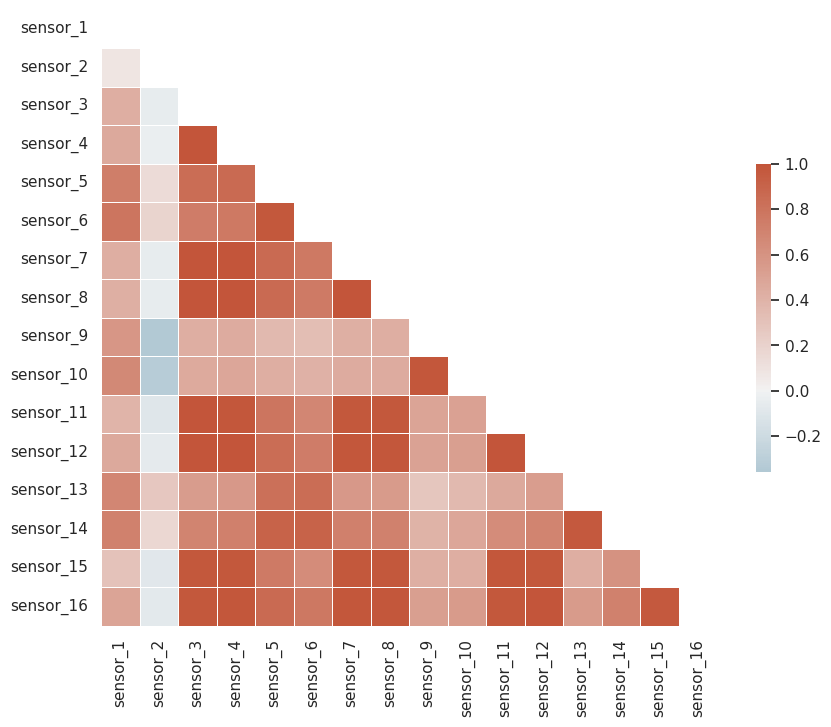

In [39]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [59]:
quantized_codes = torch.load(f"../outputs/ethylene_CO_partition_exp/quantized_aux/0/2.pt")


In [60]:
code_series = pd.Series(quantized_codes.numpy())

<Axes: ylabel='Frequency'>

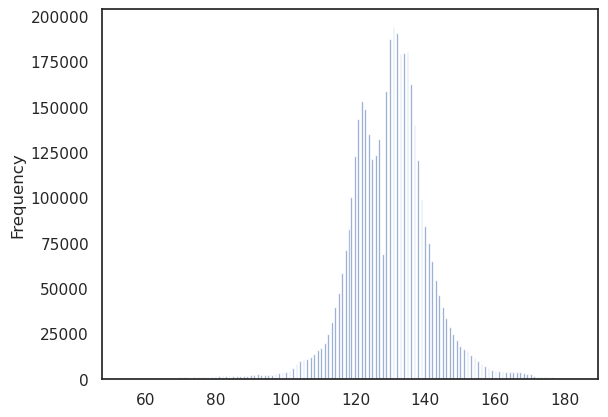

In [61]:
code_series.plot.hist(bins=256, alpha=0.8)

In [3]:
table, rel_ebs = load_data("heavy_drinking")

In [4]:
table

pyarrow.Table
time: int64
x: double
y: double
z: double
----
time: [[0,0,1493733882409,1493733882455,1493733882500,...,1493736777617,1493736777619,1493736777627,1493736777631,1493736777641],[1493736777641,1493736777648,1493736777649,1493736777667,1493736777667,...,1493737821975,1493737821985,1493737822000,1493737822009,1493737822025],...,[1493824275576,1493824275577,1493824275595,1493824275601,1493824275620,...,1493828001393,1493828001417,1493828001443,1493828001470,1493828001494],[1493828001518,1493828001542,1493828001568,1493828001595,1493828001617,...,1493829248196,1493829248220,1493829248245,1493829248270,1493829248294]]
x: [[0,0,0.0758,-0.0359,-0.2427,...,-0,0.0005,0.0025,0.0112,-0.0004],[-0.0005,0.0014,-0.042,0,-0.0008,...,0.0091,-0,0.009,-0.0006,-0.0103],...,[0.0852343999999999,0.0007,0.0006,0.066538334,-0.0012,...,0.029138565,0.009840965,0.06714535,0.105213165,0.009912491],[0.08671951,0.06749725,0.087278366,0.030441284,0.1065979,...,-0.13395596,-0.100764275,-0.13185287,-0.14970

In [5]:
df = table.to_pandas()

In [6]:
df.describe()

,time,x,y,z
count,1.405757e+07,1.405757e+07,1.405757e+07,1.405757e+07
mean,1.493778e+12,-9.269848e-03,-7.168398e+06,7.168398e+06
std,5.640453e+08,9.540696e-01,3.528998e+07,3.528998e+07
min,0.000000e+00,-4.333507e+01,-1.809008e+08,-4.902300e+01
25%,1.493755e+12,-5.700000e-03,-4.500000e-03,-4.200000e-03
50%,1.493779e+12,-2.000000e-04,-2.000000e-04,6.100000e-03
75%,1.493801e+12,7.600000e-03,4.500000e-03,4.605889e-02
max,1.493829e+12,3.922540e+01,2.731123e+01,1.809008e+08


In [15]:
df.corr(method='spearman')

,time,x,y,z
time,1.000000,-0.016410,0.038047,0.146469
x,-0.016410,1.000000,-0.002553,0.110523
y,0.038047,-0.002553,1.000000,-0.053050
z,0.146469,0.110523,-0.053050,1.000000


In [16]:
df.corr()

,time,x,y,z
time,1.000000,-0.000330,0.005394,-0.005394
x,-0.000330,1.000000,0.058263,-0.058263
y,0.005394,0.058263,1.000000,-1.000000
z,-0.005394,-0.058263,-1.000000,1.000000


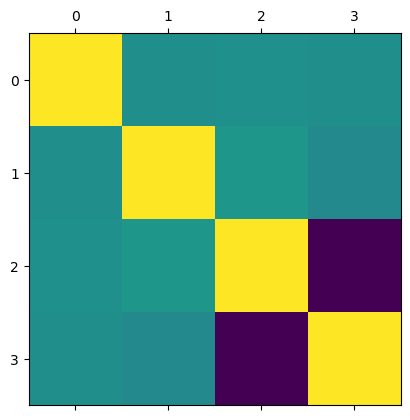

In [11]:
plt.matshow(df.corr())
plt.show()

In [17]:
df.iloc[:10,1:]

,x,y,z
0,0.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000
2,0.0758,0.0273,-0.0102
3,-0.0359,0.0794,0.0037
4,-0.2427,-0.0861,-0.0163
5,-0.2888,0.0514,-0.0145
6,-0.0413,-0.0184,-0.0105
7,-0.0413,-0.0001,0.0017
8,-0.0286,-0.0028,-0.0094
9,-0.0543,-0.0410,-0.0109
